<a href="https://colab.research.google.com/github/DmitryKostin/tinkoff-industry-data-analysis/blob/main/01_sql_project/tinkoff_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выгрузка данных из БД

In [ ]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'student', # имя пользователя
'pwd': 'JvLda93aA', # пароль
'host': '158.160.52.106',
'port': 5432, # порт подключения
'db': 'postgres'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string) 

In [ ]:
def select(sql):
  return pd.read_sql(sql, con=engine)

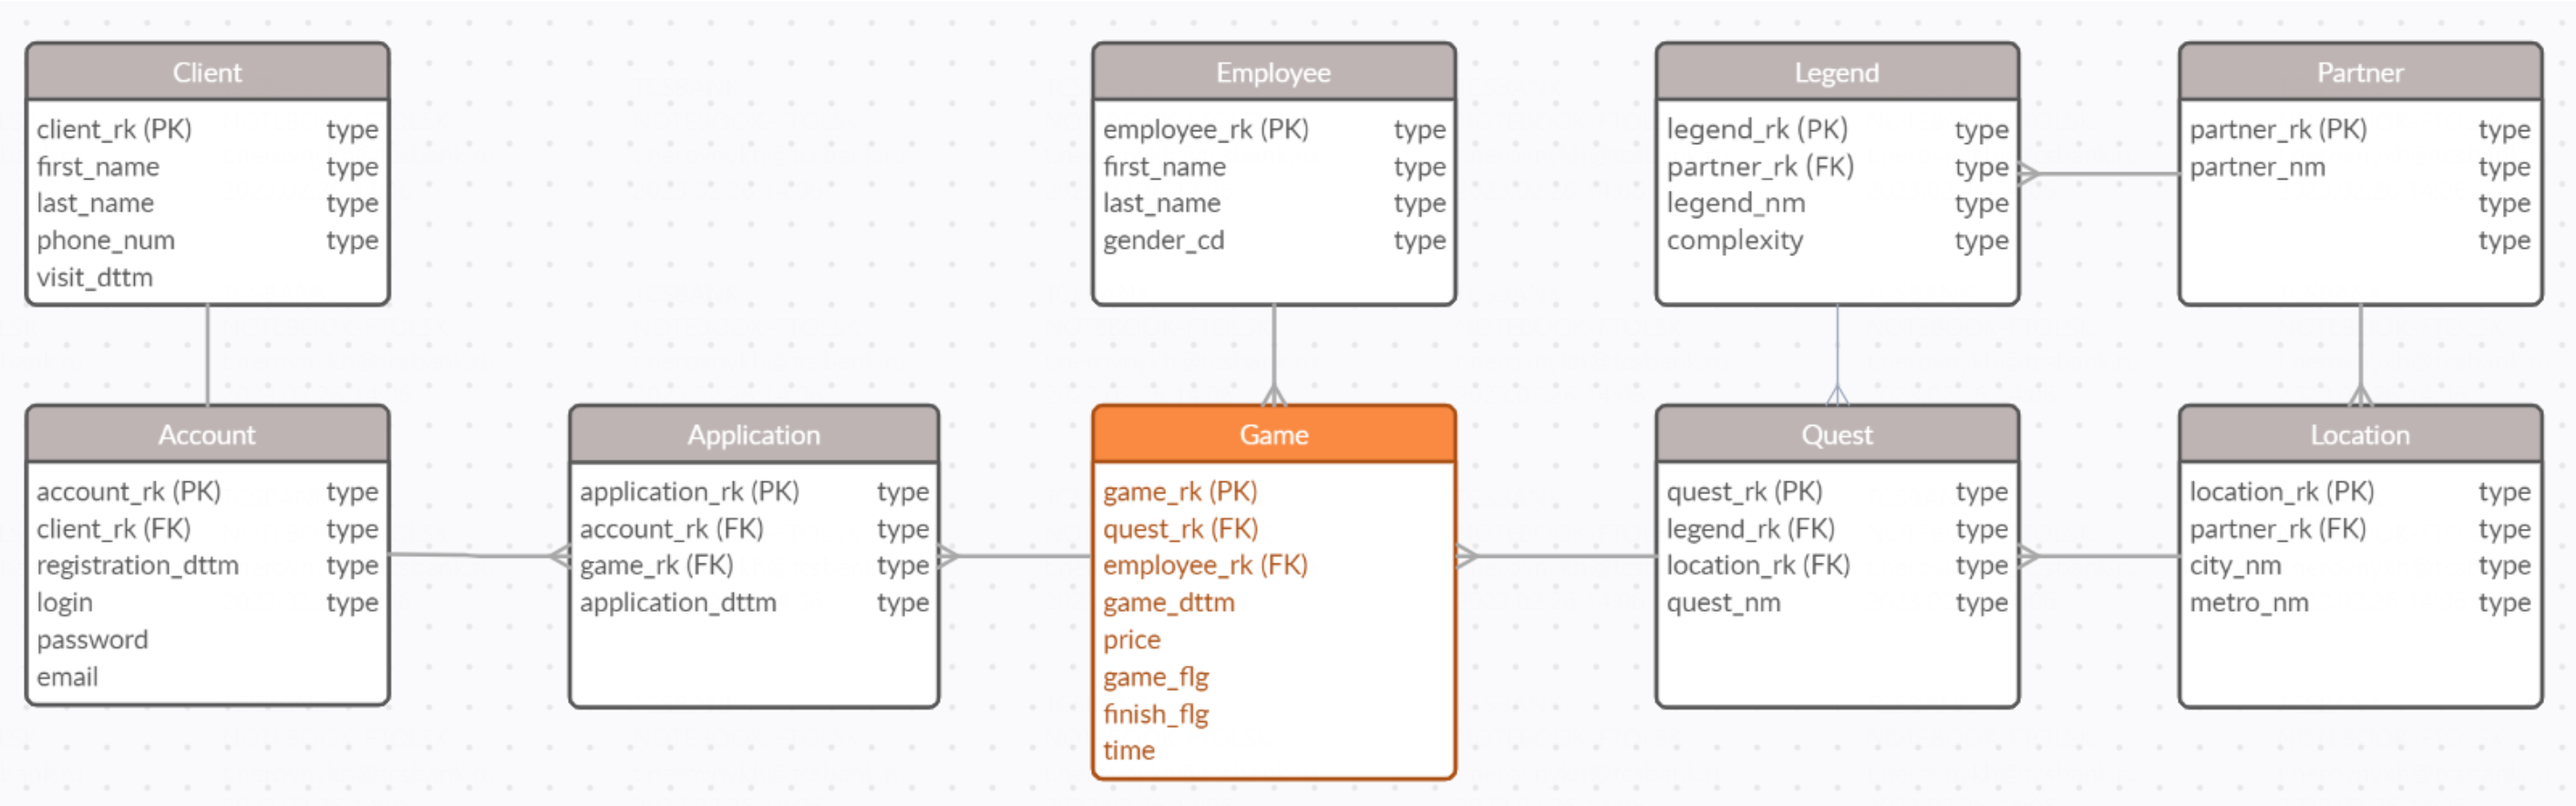

## Описание базы данных

### Partner
Витрина содержит информацию о наших бизнес партнерах.

| Название поля | Описание                         |
| ------------- | -------------------------------- |
| Partner_rk    | Ключ партнера в хранилище данных |
| Partner_nm    | Название партнера                |

### Location
Витрина содержит информацию о тех локациях, на которых проходят квесты нашей франшизы.

| Название поля | Описание                                        |
| ------------- | ----------------------------------------------- |
| Partner_rk    | Ключ партнера в хранилище данных                |
| Partner_nm    | Название партнера                               |
| Location_rk   | Ключ локации в хранилище данных                 |
| Partner_rk    | Ключ партнера, которому принадлежит эта локация |
| City_nm       | Название города, в котором расположена локация  |
| Metro_nm      | Название ближайшей станции метро к локации      |

### Legend
Витрина содержит информацию о легендах (сценариях/сюжетах) конкретных квестов.

| Название поля | Описание                                                           |
| ------------- | ------------------------------------------------------------------ |
| Legend_rk     | Ключ легенды в хранилище данных                                    |
| Partner_rk    | Ключ партнера, которому принадлежит авторское право на эту легенду |
| Legend_nm     | Запатентованное название сюжета                                    |
| Complexity    | Сложность квеста, идущего по данному сюжету                        |

### Quest
Витрина содержит информацию о квестах, в которые могут играть наши клиенты.

| Название поля | Описание                                      |
| ------------- | --------------------------------------------- |
| Quest_rk      | Ключ квеста в хранилище данных                |
| Legend_rk     | Ключ легенды, в рамках которой играется квест |
| Location_rk   | Ключ локации, на которой квест располагается  |
| Quest_nm      | Название квеста                               |

### Employee
Витрина содержит информацию о сотрудниках, которые проводят игры и помогают командам.

| Название поля | Описание                           |
| ------------- | ---------------------------------- |
| Employee_rk   | Ключ сотрудника в хранилище данных |
| First_name    | Имя сотрудника                     |
| Last_name     | Фамилия сотрудника                 |
| Gender_cd     | Пол сотрудника                     |

### Game
Витрина с расписанием запланированных и состоявшихся игр (отдельных прохождений и просто слотов в расписании по играм).

| Название поля | Описание                                        |
| ------------- | ----------------------------------------------- |
| Game_rk       | Ключ отдельной игры в хранилище данных          |
| Quest_rk      | Ключ квест, в рамках которого проходила игра    |
| Employee_rk   | Ключ сотрудника, который проводил игру          |
| Game_dttm     | Дата-время запланированного начала игры         |
| Price         | Стоимость игры                                  |
| Game_flg      | Флаг того, что игра состоялась                  |
| Finish_flg    | Флаг того, что состоявшуюся игру удалось пройти |
| Time          | Время прохождения игры                          |

### Client
Витрина содержит информацию о клиентах, посетивших наш сайт.

| Название поля | Описание                                            |
| ------------- | --------------------------------------------------- |
| Client_rk     | Ключ клиента в ХД                                   |
| First_name    | Имя клиента                                         |
| Last_name     | Фамилия клиента                                     |
| Phone_num     | Номер телефона                                      |
| Visit_dttm    | Дата и время, когда клиент крайний раз посещал сайт |

### Account
Витрина содержит информацию об аккаунтах клиентов (если у клиента есть аккаунт, значит он зарегистрировался на сайте).

| Название поля     | Описание                                  |
| ----------------- | ----------------------------------------- |
| Account_rk        | Ключ аккаунта клиента в ХД                |
| Client_rk         | Ключ клиента в ХД                         |
| Registration_dttm | Дата и время регистрации клиента на сайте |
| Login             | Логин зарегистрированного клиента         |
| Password          | Пароль зарегистрированного клиента        |
| Email             | Адрес электронной почты клиента           |

### Application
Витрина содержит информацию о заявках клиентов на иргы (заявку может оставить только авторизованный клиент, также разные клиенты могут оставить заявку на одну и ту же игру).

| Название поля    | Описание                            |
| ---------------- | ----------------------------------- |
| Application_rk   | Ключ заявки в ХД                    |
| Account_rk       | Ключ аккаунта клиента в ХД          |
| Client_rk        | Ключ клиента в ХД                   |
| Application_dttm | Дата и время заявки на игру клиента |

In [ ]:
sql = '''
select first_name, gender_cd, game_dttm 
from msu_analytics.employee as emp 
inner join msu_analytics.game as g on emp.employee_rk = g.employee_rk
'''

select(sql)

,first_name,gender_cd,game_dttm
0,Мирослав,М,2023-02-03 12:13:17.307846
1,Мирослав,М,2023-03-09 06:00:21.726697
2,Мирослав,М,2023-02-21 21:51:25.196543
3,Мирослав,М,2023-02-24 21:03:04.656090
4,Мирослав,М,2022-12-13 13:17:28.688687
...,...,...,...
451,Эмма,Ж,2023-03-30 12:34:02.152995
452,Эмма,Ж,2022-11-24 15:03:30.959265
453,Эмма,Ж,2023-03-01 08:14:33.913841
454,Эмма,Ж,2023-02-22 08:56:15.697173


In [ ]:
sql = '''
select first_name, gender_cd, game_dttm 
from msu_analytics.employee as emp 
left join msu_analytics.game as g on emp.employee_rk = g.employee_rk 
where g.employee_rk is not null
'''

select(sql)

,first_name,gender_cd,game_dttm
0,Кристина,Ж,2022-12-30 10:39:51.834731
1,Кристина,Ж,2023-02-11 04:59:34.900210
2,Кристина,Ж,2023-01-21 20:34:24.455320
3,Кристина,Ж,2022-11-26 02:37:06.112500
4,Кристина,Ж,2023-03-08 03:40:27.484238
...,...,...,...
451,Эмма,Ж,2023-03-30 12:34:02.152995
452,Эмма,Ж,2022-11-24 15:03:30.959265
453,Эмма,Ж,2023-03-01 08:14:33.913841
454,Эмма,Ж,2023-02-22 08:56:15.697173


## Задание 6

Со сколькими креативными агентствами мы работаем? Креативное агентство – это партнер без единой локации, но имеющий патент на хотя бы одну легенду.

Ответ - 4

In [ ]:
sql = '''

SELECT distinct p.partner_nm
FROM msu_analytics.partner p
left join msu_analytics.location l on p.partner_rk = l.partner_rk
left join msu_analytics.legend le on p.partner_rk = le.partner_rk
where le.legend_rk is not null and l.location_rk is null
order by 1 
'''
select(sql)

,partner_nm
0,ЗАО Орион
1,ОАО МясГорТяж
2,ООО Компания Монтаж
3,ПАО ГаражЖелДор


## Задание 7

У какого квеста (укажите его quest_nm) разница доли состоявшихся квестов в декабре 2022 и в январе 2023 наибольшая по модулю? Долей считать количество состоявшихся квестов деленное на количество заявленных. В случае наличия нескольких квестов, подходящих под условие, требуется вывести тот, у которого значение quest_rk больше.

Ответ - Реактивный восходящий тренд

**1-й способ решения**

In [ ]:
sql = '''
with dec_rate as
(
select q.quest_nm, g.quest_rk, avg(g.game_flg) as december_rate from msu_analytics.game g
left join msu_analytics.quest q on g.quest_rk = q.quest_rk
where date_trunc('month', g.game_dttm) = '2022-12-01'
group by g.quest_rk, q.quest_nm
),

jan_rate as
(
select q.quest_nm, g.quest_rk, avg(g.game_flg) as january_rate from msu_analytics.game g
left join msu_analytics.quest q on g.quest_rk = q.quest_rk
where date_trunc('month', g.game_dttm) = '2023-01-01'
group by g.quest_rk, q.quest_nm
)

select *,
abs(dr.december_rate - jr.january_rate) as diff
from dec_rate dr
left join jan_rate jr on dr.quest_rk = jr.quest_rk
order by diff desc
'''
select(sql)

,quest_nm,quest_rk,december_rate,quest_nm,quest_rk,january_rate,diff
0,Согласование,13,1.000000,None,NaN,NaN,NaN
1,Привет Андрей!,22,0.750000,None,NaN,NaN,NaN
2,Реактивный восходящий тренд,9,0.000000,Реактивный восходящий тренд,9.0,1.000000,1.000000
3,Настройка масштабируемой матрицы,14,0.000000,Настройка масштабируемой матрицы,14.0,0.750000,0.750000
4,Огни ночного города,31,0.666667,Огни ночного города,31.0,0.000000,0.666667
5,Очного выделенный шифрования,3,0.500000,Очного выделенный шифрования,3.0,1.000000,0.500000
6,Ограбление по-мексикански,25,0.800000,Ограбление по-мексикански,25.0,0.500000,0.300000
7,Подпольное казино,15,0.750000,Подпольное казино,15.0,1.000000,0.250000
8,Оперативные работники,17,0.750000,Оперативные работники,17.0,1.000000,0.250000
9,ФБР vs ФСБ,30,1.000000,ФБР vs ФСБ,30.0,0.750000,0.250000


**2-й способ решения**

In [ ]:
sql = '''
with december as 
(select q.quest_nm, 
       count(g.game_flg) as total, 
       sum(g.game_flg),
       sum(g.game_flg)::float / count(g.game_flg) as december_ratio
from msu_analytics.game g
left join msu_analytics.quest q on g.quest_rk = q.quest_rk
where date_trunc('month', g.game_dttm) = '2022-12-01'
group by q.quest_nm),

january as
(
select q.quest_nm, 
       count(g.game_flg) as total, 
       sum(g.game_flg),
       sum(g.game_flg)::float / count(g.game_flg) as january_ratio
from msu_analytics.game g
left join msu_analytics.quest q on g.quest_rk = q.quest_rk
where date_trunc('month', g.game_dttm) = '2023-01-01'
group by q.quest_nm
)

select d.quest_nm,
       d.december_ratio,
       j.january_ratio,
       abs(d.december_ratio - j.january_ratio) as diff   
from december d
left join january j on d.quest_nm = j.quest_nm
order by 4 desc
'''

select(sql)

,quest_nm,december_ratio,january_ratio,diff
0,Привет Андрей!,0.750000,NaN,NaN
1,Согласование,1.000000,NaN,NaN
2,Реактивный восходящий тренд,0.000000,1.000000,1.000000
3,Настройка масштабируемой матрицы,0.000000,0.750000,0.750000
4,Огни ночного города,0.666667,0.000000,0.666667
5,Очного выделенный шифрования,0.500000,1.000000,0.500000
6,Ограбление по-мексикански,0.800000,0.500000,0.300000
7,Оперативные работники,0.750000,1.000000,0.250000
8,Подпольное казино,0.750000,1.000000,0.250000
9,ФБР vs ФСБ,1.000000,0.750000,0.250000
